Array data
shape: (15767552, 2)
dtype: int16
min, max: -32768 32767


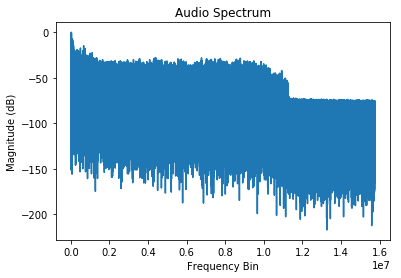

In [30]:
import scipy
from scipy.io.wavfile import read
from scipy.signal import hann
from scipy.fftpack import rfft
from scipy import signal
import matplotlib.pyplot as plt
import librosa
file_path = '/Users/mcassettix/Downloads/'
file_name = 'Bassnectar.wav'

def show_info(aname, a):
    print("Array", aname)
    print("shape:", a.shape)
    print("dtype:", a.dtype)
    print("min, max:", a.min(), a.max())


sampFreq, snd  = read(file_path + file_name)

show_info("data", snd)

snd = snd / (2.**15)
audio = snd[:,0] 

#audio
# apply a Hanning window
#window = hann(1024)
#audio = audio[0:1024] * window
# fft
mags = abs(rfft(audio))
# convert to dB
mags = 20 * scipy.log10(mags)
# normalise to 0 dB max
mags -= max(mags)
# plot
plt.plot(mags)
# label the axes
plt.ylabel("Magnitude (dB)")
plt.xlabel("Frequency Bin")
# set the title
plt.title("Audio Spectrum")
plt.show()

In [31]:
timeArray = np.arange(0, 1587600, 1)
timeArray = timeArray / sampFreq
timeArray = timeArray * 1000  #scale to milliseconds


In [32]:
# Beat tracking example
from __future__ import print_function
import librosa

# 1. Get the file path to the included audio example
filename = file_path + file_name 

# 2. Load the audio as a waveform `y`
#    Store the sampling rate as `sr`
y, sr = librosa.load(filename)

# 3. Run the default beat tracker
tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)

print('Estimated tempo: {:.2f} beats per minute'.format(tempo))

# 4. Convert the frame indices of beat events into timestamps
beat_times = librosa.frames_to_time(beat_frames, sr=sr)

#print('Saving output to beat_times.csv')
#librosa.output.times_csv('beat_times.csv', beat_times)

Estimated tempo: 117.45 beats per minute


In [33]:
beat_times

array([1.16099773e-01, 6.26938776e-01, 1.18421769e+00, 1.74149660e+00,
       2.29877551e+00, 2.85605442e+00, 3.36689342e+00, 3.87773243e+00,
       4.38857143e+00, 4.89941043e+00, 5.41024943e+00, 5.92108844e+00,
       6.43192744e+00, 6.94276644e+00, 7.45360544e+00, 7.96444444e+00,
       8.47528345e+00, 8.98612245e+00, 9.49696145e+00, 1.00078005e+01,
       1.05186395e+01, 1.10294785e+01, 1.15403175e+01, 1.20511565e+01,
       1.25387755e+01, 1.30263946e+01, 1.35140136e+01, 1.40016327e+01,
       1.44892517e+01, 1.49768707e+01, 1.54877098e+01, 1.59985488e+01,
       1.64861678e+01, 1.69737868e+01, 1.74614059e+01, 1.79490249e+01,
       1.84366440e+01, 1.89474830e+01, 1.94583220e+01, 1.99691610e+01,
       2.04567800e+01, 2.09443991e+01, 2.14552381e+01, 2.19428571e+01,
       2.24536961e+01, 2.29645351e+01, 2.34753741e+01, 2.39629932e+01,
       2.44506122e+01, 2.49382313e+01, 2.54490703e+01, 2.59599093e+01,
       2.64475283e+01, 2.69583673e+01, 2.74692063e+01, 2.80032653e+01,
      

In [34]:
# Set the hop length; at 22050 Hz, 512 samples ~= 23ms
hop_length = 512

# Separate harmonics and percussives into two waveforms
y_harmonic, y_percussive = librosa.effects.hpss(y)

# Beat track on the percussive signal
tempo, beat_frames = librosa.beat.beat_track(y=y_percussive,
                                             sr=sr)

# Compute MFCC features from the raw signal
mfcc = librosa.feature.mfcc(y=y, sr=sr, hop_length=hop_length, n_mfcc=13)

# And the first-order differences (delta features)
mfcc_delta = librosa.feature.delta(mfcc)

# Stack and synchronize between beat events
# This time, we'll use the mean value (default) instead of median
beat_mfcc_delta = librosa.util.sync(np.vstack([mfcc, mfcc_delta]),
                                    beat_frames)

# Compute chroma features from the harmonic signal
chromagram = librosa.feature.chroma_cqt(y=y_harmonic,
                                        sr=sr)

# Aggregate chroma features between beat events
# We'll use the median value of each feature between beat frames
beat_chroma = librosa.util.sync(chromagram,
                                beat_frames,
                                aggregate=np.median)

# Finally, stack all beat-synchronous features together
beat_features = np.vstack([beat_chroma, beat_mfcc_delta])

In [35]:
M = librosa.feature.melspectrogram(y=y)

AttributeError: module 'librosa' has no attribute 'display'

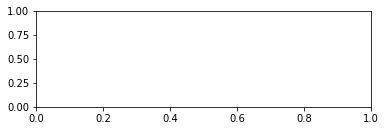

In [36]:
# And plot the results
plt.figure(figsize=(6, 6))
ax = plt.subplot(3, 1, 1)

librosa.display.specshow(librosa.power_to_db(chromagram, ref=np.max),
                         y_axis='mel', x_axis='time')


In [ ]:
y_harmonic, y_percussive = librosa.effects.hpss(y)

In [ ]:
#percentage of bass, arpeggios?, 

# New heading

In [ ]:
y, sr = librosa.load(filename)
cent = librosa.feature.spectral_centroid(y=y, sr=sr)
S, phase = librosa.magphase(librosa.stft(y=y))
librosa.feature.spectral_centroid(S=S)


In [ ]:
plt.figure()
plt.subplot(2, 1, 1)
plt.semilogy(cent.T, label='Spectral centroid')
plt.ylabel('Hz')
plt.xticks([])
plt.xlim([0, cent.shape[-1]])
plt.legend()
plt.subplot(2, 1, 2)
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                          y_axis='log', x_axis='time')
plt.title('log Power spectrogram')
plt.tight_layout()
plt.show()

In [ ]:
D = librosa.stft(y)
D_harmonic, D_percussive = librosa.decompose.hpss(D)

In [ ]:
# Pre-compute a global reference power from the input spectrum
rp = np.max(np.abs(D))

plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
librosa.display.specshow(librosa.amplitude_to_db(D, ref=rp), y_axis='log')
plt.colorbar()
plt.title('Full spectrogram')

plt.subplot(3, 1, 2)
librosa.display.specshow(librosa.amplitude_to_db(D_harmonic, ref=rp), y_axis='log')
plt.colorbar()
plt.title('Harmonic spectrogram')

plt.subplot(3, 1, 3)
librosa.display.specshow(librosa.amplitude_to_db(D_percussive, ref=rp), y_axis='log', x_axis='time')
plt.colorbar()
plt.title('Percussive spectrogram')
plt.tight_layout()
plt.show()

In [ ]:
librosa.feature.rmse(y=y)
S, phase = librosa.magphase(librosa.stft(y))
rms = librosa.feature.rmse(S=S)

In [ ]:
plt.figure()
plt.subplot(2, 1, 1)
plt.semilogy(rms.T, label='RMS Energy')
plt.xticks([])
plt.xlim([0, rms.shape[-1]])
plt.legend(loc='best')
plt.subplot(2, 1, 2)
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time')
plt.title('log Power spectrogram')
plt.tight_layout()

In [ ]:
pitches, magnitudes = librosa.core.piptrack(y=y, sr=sr, fmin=75, fmax=1600)

In [ ]:
float(all_pitches[0])

In [ ]:
def detect_pitch(y, sr, onset_offset=5, fmin=75, fmax=1400):
    y = highpass_filter(y, sr)

    o_env = librosa.onset.onset_strength(y, sr=sr)
    times = librosa.frames_to_time(np.arange(len(o_env)), sr=sr)

    onset_frames = librosa.onset.onset_detect(y=o_env, sr=sr)
    pitches, magnitudes = librosa.piptrack(y=y, sr=sr, fmin=fmin, fmax=fmax)

    notes = []

    for i in range(0, len(onset_frames)):
        onset = onset_frames[i] + onset_offset
        index = magnitudes[:, onset].argmax()
        pitch = pitches[index, onset]
        if (pitch != 0):
            notes.append(librosa.hz_to_note(pitch))

    return notes



In [ ]:
notes = detect_pitch(y,sr)

In [37]:
notes

NameError: name 'notes' is not defined